## Welcome to your first Data Project! - In Python3

Check out the Kaggle Titanic Challenge at the following link:

https://www.kaggle.com/c/titanic-gettingStarted

Note: You'll need to make an account to access the data.

Download the train.csv file and save it to the same location as your iPython Notebooks.

---
#### This notebook was build in Python3 while doing the course exercise. The original noteboook is in Python2.

##### Since the original course publication some of the libraries have seen their behaviour modifed, especially Searborn. Throughout the notebook I've tried to highlight where the code differs from the original in order to produce the same outputs. When the libraries do not have a similar output now, I tried to use the next best options available.


##### As a side note, while doing this exercise and searching the Web to find solutions for the graphics differences that I was encountering, I came across this great general analysis notebook on the Kaggle Titanic: https://www.kaggle.com/masumrumi/a-statistical-analysis-of-titanic-with-ml-models

---

In [1]:
# let's open with pandas
import pandas as pd
from pandas import Series, DataFrame

# Load the Titanic train data as a DataFrame
titanic_df = pd.read_csv("data/train.csv")

In [2]:
# preview the data
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# get the overall info of the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# NOTE: This piece is a bit different from the original course notebook.
#       I'll be explicitely converting some of the columns to the category data type so that those columns show ordered in
#        the graphics output. Without this, the values in the graphics is just taken from the order it appears in the data.
#       The other option would be to use the "order" arguments in the functions to indicate the sorting we want.
#       Also, throughout the notebook, each time I create a new column, we will convert that column to categorical if it's
#        used in the graphics
titanic_df.Sex = pd.Categorical(titanic_df.Sex)
titanic_df.Cabin = pd.Categorical(titanic_df.Cabin)

In [5]:
# let's see how the dataset is after the operarion
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null category
Embarked       889 non-null object
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 78.5+ KB


All good data science projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data skills!

First some basic questions:

    1.) Who where the passengers on Titanic? (Age, Gender, Class, .. etc.)?
    2.) What deck where the passengers on and how it does relate to their class.?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?

Then, we'll dig deeper with a broader question:

    5.) What factors helped someone survive the sinking?

Let's start with the first question: Who where the passengers on Titanic?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Note: I forced the default plot style to classic in order to produce graphics with the similar style as the course visual outputs.
#        Due to the matplotlib versions since then it will not exactly the same outputs as the course notebooks but will be close.
plt.style.use('classic')

%matplotlib inline

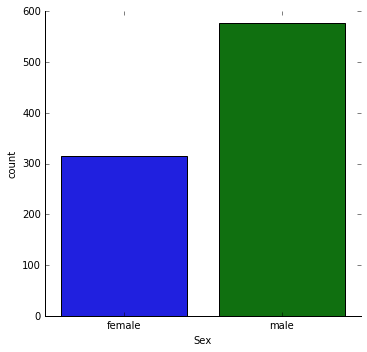

In [7]:
# let's check the gender
# Note: factorplot has been depracted in Seaborn and we use catplot instead, which is much the same as factorplot. However,
#        catplot does not seem to order the categories by default, unless they have the type Categorical.
sns.catplot(x="Sex", data=titanic_df, kind="count")

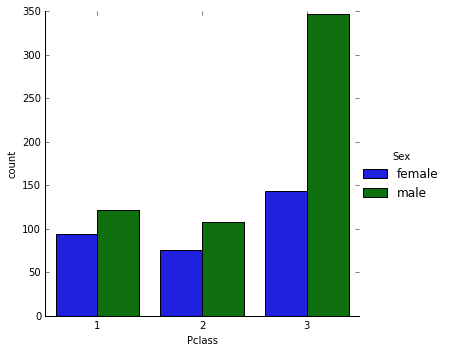

In [8]:
# let's seperate the genders by classes. We can use the hue argument here
sns.catplot("Pclass", data=titanic_df, hue = "Sex", kind="count")

There are quite a few more males in the 3rd class. However, it may be useful to know the split between males, females and children.

In [9]:
# Let's treat everyone under 16 as a child and then use the apply technique with a function to create a new column
# As a reference review lecture 45

# Funtion to sort through sex
def male_female_child(passenger):
    # get the age and sex
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return sex

# we'll define a new column names person. Remember to specify the axis = 1 for columns and not index
titanic_df["person"] = titanic_df[["Age", "Sex"]].apply(male_female_child, axis=1)

# Note: convert data type to category to have the correct sort in the graphics
titanic_df.person = pd.Categorical(titanic_df.person)

In [10]:
# let's see how it worked
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


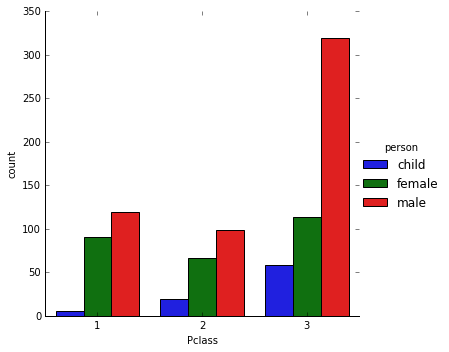

In [11]:
sns.catplot("Pclass", data=titanic_df, hue = "person", kind="count")

Interesting, quite a bit more children in 3rd class and not much on 1st. So, let's look at the distribution of ages to get a more precise picture of who the passengers were.

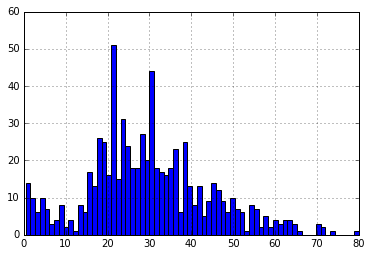

In [12]:
titanic_df["Age"].hist(bins=70)

So many infants!!

In [13]:
# we could get a quick overall comparison of male, female and children
titanic_df["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

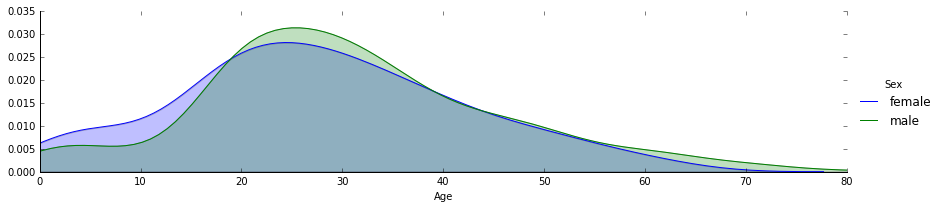

In [14]:
# Another way to visualize the data is to use FaceGrid to plot multiple kdeplots on one plot.
# Set the figure equal to a facegrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)

# next, use the map to plot all the possible kdeplots for the "age" column by hue choice
fig.map(sns.kdeplot, "Age", shade=True)

# set the x max limit by the oldest passenger
oldest = titanic_df["Age"].max()

# since we know no one can have negative years old set the x lower limit to 0
fig.set(xlim=(0, oldest))

# Finally add a legend
fig.add_legend()

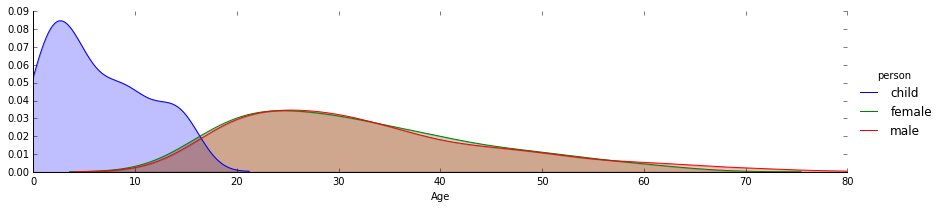

In [15]:
# we can also do the same thing for the "person" column to include children
fig = sns.FacetGrid(titanic_df, hue="person", aspect=4)
fig.map(sns.kdeplot, "Age", shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

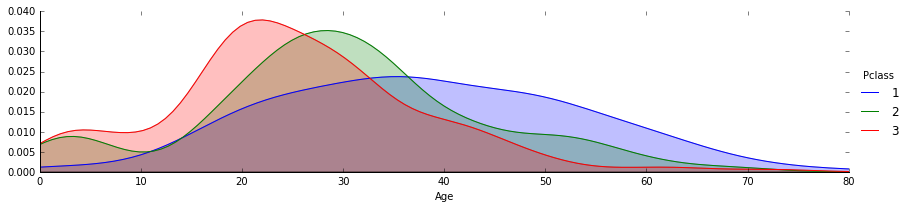

In [16]:
# let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass", aspect=4)
fig.map(sns.kdeplot, "Age", shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. So let's move on to our 2nd question. What deck were the passengers on and it does relate to their class.

In [17]:
# let's look again to the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


We can see that the cabin column has information on the deck but it has several NaN values, so we'll have to drop them

In [18]:
# first we drop the NaN values and create a new object deck
deck = titanic_df["Cabin"].dropna()

In [19]:
# let's look
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: category
Categories (147, object): [A10, A14, A16, A19, ..., F38, F4, G6, T]

Notice we only need the first letter of the deck to classify the level (e.g. A, B, C, D, E, F)

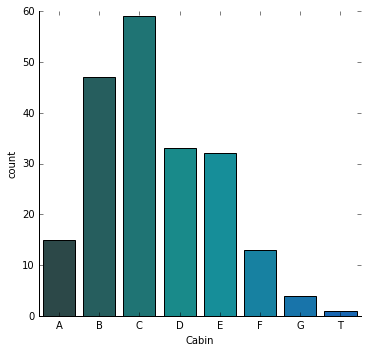

In [20]:
# So let's grab that letter for the deck level with a simple loop
# Set empty list for the levels
levels = []

# Loop to grab the first letter
for level in deck:
    levels.append(level[0])

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ["Cabin"]

# Note: Convert data type to category to have the correct sort in the graphics
cabin_df.Cabin = pd.Categorical(cabin_df.Cabin)

sns.catplot("Cabin", data=cabin_df, kind="count", palette="winter_d")

Interesting that we have a "T" deck, which doesn't make sense. Let's drop out and plot again

In [21]:
cabin_df = cabin_df[cabin_df.Cabin != "T"]
# Note: Since, we're unsing categories, although we do not have now any value T in the data the category T still exists. As such, we must also drop the
#        category, otherwise it will continue to show in the graphics.
cabin_df.Cabin = cabin_df.Cabin.cat.remove_unused_categories()

c:\users\psilva\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


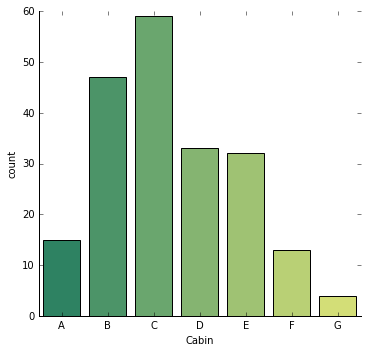

In [22]:
# Replot
sns.catplot("Cabin", data=cabin_df, kind="count", palette="summer")

Quick note: we've used "winter_d" and "summer" as palettes, but we can choose any other palette. Check out the following link for more pallete names (you can also add _d at the end of any palette do make if darker

Link: http://matplotlib.org/users/colormaps.html

Now that we have analyzed the distribution by decks let's go ahead and answer the third question:

3.) Where did the passengers come from?

In [23]:
# look again to the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

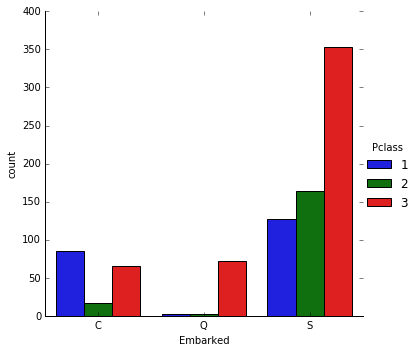

In [24]:
# Now we can make a quick catplot to check out the results, note the x_order argument, used to deal with NaN
sns.catplot("Embarked", data=titanic_df, kind="count", hue="Pclass", order=["C", "Q", "S"])

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

Now let's take a look at the 4th question:

    4.) Who was alone and who was with family?

In [25]:
# Lets start by adding a column to define alone
# we'll add a parent child column with the sibspcolumn
titanic_df["Alone"] = titanic_df.Parch + titanic_df.SibSp
titanic_df["Alone"]

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.


In [26]:
# Look for >0 and == to set the status
titanic_df["Alone"].loc[titanic_df["Alone"] > 0] = "With Family"
titanic_df["Alone"].loc[titanic_df["Alone"] == 0] = "Alone"

# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

c:\users\psilva\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


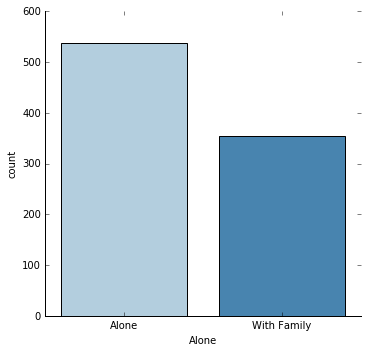

In [28]:
# now let's make a simple visualization
# Note: added order argumento to get the same order as original notebook

# Note: convert data type to category to have the correct sort in the graphics
titanic_df.Alone = pd.Categorical(titanic_df.Alone)

sns.catplot("Alone", data=titanic_df, kind="count", palette="Blues", order=np.sort(titanic_df["Alone"].unique()))

Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: *What factors helped someone survive the sinking?*

Great! Now that we've analyzed the data let's fo ahead and take a look at the most interesting (and open-ended) question: *What factors helped someone survive the sinking?*

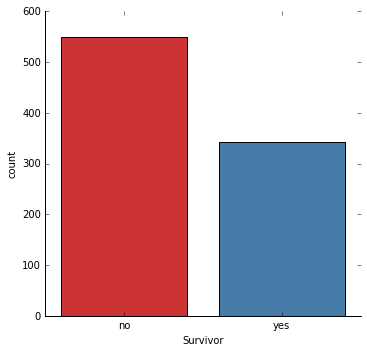

In [29]:
# Let's create a new column for legibility purposes through mapping (Lecture 36)
titanic_df["Survivor"] = titanic_df.Survived.map({0 : "no", 1: "yes"})

# Note: convert data type to category to have the correct sort in the graphics
titanic_df.Survivor = pd.Categorical(titanic_df.Survivor)

# let's have a quick overall view of survived vs died
sns.catplot("Survivor", data=titanic_df, kind="count", palette="Set1")

So, quite a few people died, more than survided. Let's see if the class of passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

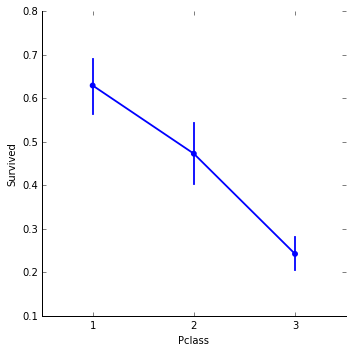

In [30]:
# let's use cat plot again
sns.catplot(x= "Pclass", y="Survived", data=titanic_df, kind="point")

Indeed the survival rates for 3rd class were substantially lower. But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use "hue" to get a better picture on this.

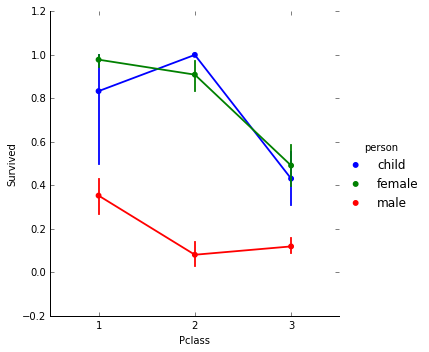

In [31]:
# Again, using catplot as above
sns.catplot(x= "Pclass", y="Survived", data=titanic_df, kind="point", hue="person")

Looking at the above plot, it seems that being a male and in the 3rd class were both not favourable for survival. Even regardless of being a male in any class dramatically decreases the chances of survival.

And what about age? Did being younger or older have an effect on survival?

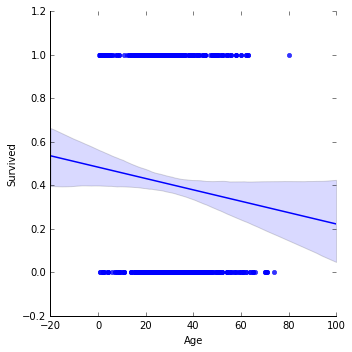

In [32]:
# let's use a linear plot on age vs survival
sns.lmplot("Age", "Survived", data=titanic_df)

Looking at the plot it seems that there's a trend that the older the passenger, the less likely they survived. Let's use hue to take a look at the effect of class and age

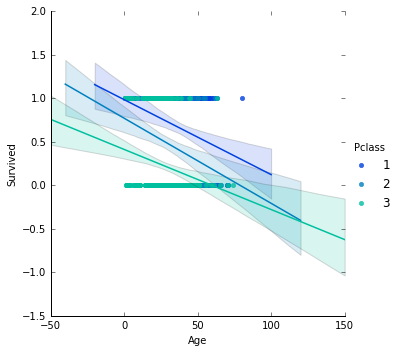

In [33]:
# let's use the lmplot again on age vs survival using hue for class seperation
sns.lmplot("Age", "Survived", data=titanic_df, hue="Pclass", palette="winter")

We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with std attached

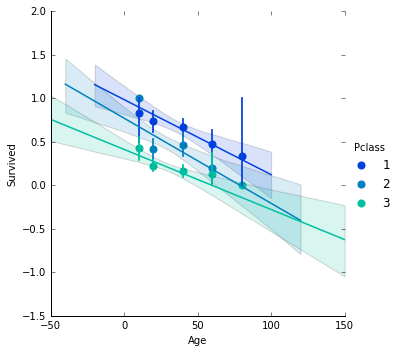

In [34]:
# let's use the lmplot again on age vs survival using hue for class seperation
generations =[10, 20, 40, 60, 80]
sns.lmplot("Age", "Survived", data=titanic_df, hue="Pclass", palette="winter", x_bins=generations)

Interesting finding on older 1st class passengers! What about if we relate gender and age with the survival set?

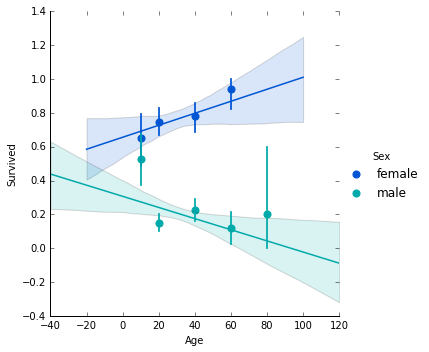

In [35]:
sns.lmplot("Age", "Survived", data=titanic_df, hue="Sex", palette="winter", x_bins=generations)

Awesome! we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival. Now you take control: Answer the following questions using pandas and seaborn:

    1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
    2.) Did having a family member increase the odds of surviving the crash?
    

### NOTE: This part is additional to the original notebook, trying to find out the best answers to the questions.

#### First, let's look at question 2.) Did having a family member increase the odds of surviving the crash?

This is additional to the original notebook

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


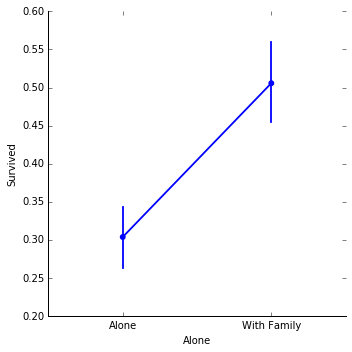

In [37]:
# let's plot the ones how survided vs alone
titanic_df["Alone"] = pd.Categorical(titanic_df.Alone)
sns.catplot(x= "Alone", y="Survived", data=titanic_df, kind="point")

As we can see, you had an higher chance of survival if you were with family.

And what about also looking at the person? Does being a male, female or children confirm the trend?

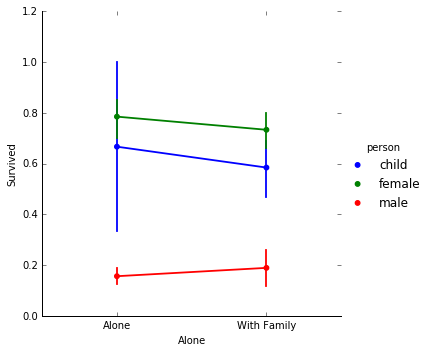

In [38]:
sns.catplot(x= "Alone", y="Survived", data=titanic_df, kind="point", hue="person")

Interesting. Only the males slightly confirm the overall trend, maybe because they were the majority. On the other hand, being female or child and alone had a slightly higher chance of survival than being with family.

Now, let's plot it against the class, instead of teh person

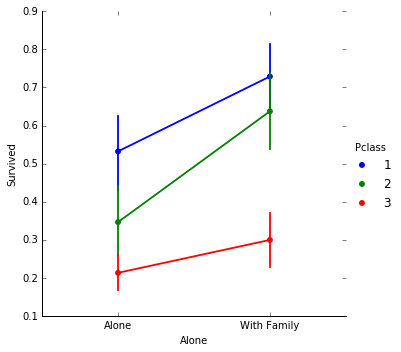

In [39]:
sns.catplot(x= "Alone", y="Survived", data=titanic_df, kind="point", hue="Pclass")

We can see that in here it follows the overall trend, the higher the class the higher chance of surviving and being with the family has an higher chance of survival in all classes.

#### Now, let's try to look at question 1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

In [40]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [41]:
# First, let's extract the level number from the Cabin as a new column in the dataframe. Notice that we will map the NaNs to Unknown
titanic_df["level"] = list(map(lambda x : "Unk" if pd.isna(x) else x[0], titanic_df.Cabin))

# Note: convert data type to category to have the correct sort in the graphics
titanic_df.level = pd.Categorical(titanic_df.level)

In [42]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,level
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,Unk
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,Unk
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,Unk
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no,Unk
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,no,Unk
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,yes,Unk
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,yes,Unk


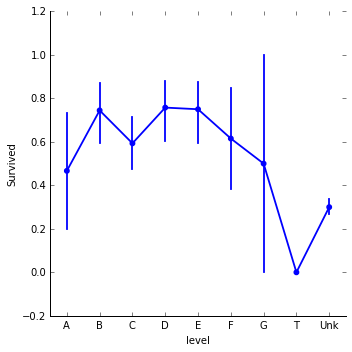

In [43]:
# REMOVE: sns.catplot(x= "level", y="Survived", data=titanic_df, kind="point", order=np.sort(titanic_df["level"].unique())) #, hue="Pclass")
sns.catplot(x= "level", y="Survived", data=titanic_df, kind="point") #, hue="Pclass")

Curious, being on higher levels did not garantee an higher chance of survival, altough the A level has a very high variance. Level A and G have about the same chance of survival, although the G level had an even higher variance than A.

Let's add the alone column as hue and see it's effect

However, we have to be very careful with the above conclusion. The truth is that the dataset reveals that it's not known the Cabin, and thus the level, for a great majority of the passengers. As shown below.

In [44]:
titanic_df.level.value_counts()

Unk    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: level, dtype: int64

So, we can only say that, for the above conclusions on the plot is for the passegers for which we know the Cabin/level. For the othe vast majority we do not know and the rate of survival against the passenger class seems to contradict a bit that conclusion or, at least, we needed more data to support or deny it.

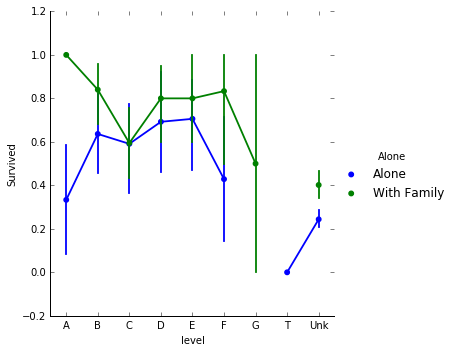

In [45]:
sns.catplot(x= "level", y="Survived", data=titanic_df, kind="point", hue="Alone")

Well, it changed a bit. The main difference is that being with family and in the A level almost garantees the survival. Of course this can only be applied to the ones for which the level was known.

### Fantastic work on your first go at a Data Analysis Project! Go ahead and keep playing with the data or try following along with Kaggle's sci-kit learn tutorial for this data (we'll look at it through a machine learning perspective later in the course)

#### Finally, I'll leave you with a gif of my favorite scene from the movie Titanic

In [46]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')